<h1><strong>Coppel</strong><br /><strong>Forecast Challenge!</strong></h1>
<blockquote><p>Your mission, Mr Phelps, should you choose to accept it,...</p> <footer>—Mission Impossible</footer><blockquote>


<p>Bienvenid@ al Forecast Challenge, la idea es que en este jupyter notebook desarrolles un mini proyecto para que nos permitas conocer la manera en la que trabajas alrededor de un proyecto de Data Science. En este caso particular el reto es crear un modelo que permita pronosticar ciertas variables que son de interés para el negocio, usando t&eacute;cnicas com&uacute;nes en ciencia de datos.</p>

<hr>

<h2>Instrucciones</h2>
<p>Para desarrollar el mini-proyecto debes:</p>
<ul>
    <li>Antes de trabajar crear un branch el cual nombrarás usando tu nombre de pila</li>
    <li>Usar Python3</li>
    <li>Tienes la posibilidad de usar cualquier librería de python en tu toolset que veas apropiada y que puedas llamar dentro de este Jupyter Notebook</li>
</ul>
<p>Sin embargo como bien sabes todo proyecto de Data Science tiene etapas muy específicas y que pueden ser intercambiables, por lo que al menos <b>se debe apreciar como:</b></p>
<ol>
    <li>analizas la data</li>
    <li>generas/seleccionas los features</li>
    <li>diseñas/implementas el modelo</li>
    <li>entrenas el modelo </li>
    <li>pruebas y evalúas el modelo </li>    
</ol>

<p>En este repositorio encontraras un dataset llamado <b>train_data.csv</b> este dataset contiene las siguientes variables:<br>
    <ol>
        <li><b>order_date</b> : fecha en la que se compr&oacute; el SKU</li>
        <li><b>sku</b> : id del art&iacute;culo</li>
        <li><b>cat</b> : id de la categoaría del SKU</li>
    </ol>
</p><br>

<h2>Objetivo</h2>
Usando la data, debes modelar el comportamiento de las categorías de tal manera que t&uacute; modelo lo pueda usar el equipo comercial para pronosticar las categorías que tienen una mayor probabilidad de venta en un mes específico del siguiente año. La data de <b>test_data.csv</b> contiene información del año 2021, para que hagas una evaluación de tu modelo vs el año 2021 y reportes ¿cómo le fué a tu modelo pronosticando el año 2021?.
<br>

<h2>Input</h2>
<p>El modelo debe de poder recibir como parámetros:
    <ul>
        <li><b>Mes (Número)</b>: El mes que vámos a pronosticar</li>
    </ul>
<h2>Output</h2>
<p>El output del modelo debe de ser un listado de las top 10 categor&iacute;as que se pornostican van a venderse en el mes usado como input. El output debe de estar en formato <b>JSON</b>, a continuación un ejemplo del formato esperado:</p><br>

<!-- HTML generated using hilite.me --><div style="background: #ffffff; overflow:auto;width:auto;border:none gray;border-width:.1em .1em .1em .8em;padding:.2em .6em;"><pre style="margin: 0; line-height: 125%">[
  {
    <span style="color: #bb0066; font-weight: bold">&quot;Month&quot;</span>:<span style="color: #dd2200; background-color: #fff0f0">6</span>,
    <span style="color: #bb0066; font-weight: bold">&quot;Categories&quot;</span>:<span style="color: #dd2200; background-color: #fff0f0">[200,678,9876]</span>
  }
]
</pre></div>
<br> 
<h2>Deadline!</h2>
Para cumplir este reto tendras 1 semana (7 días) a partir de la recepción en tu correo, no quiero ver si sabes mucho o poco, sólo me interesa ver como estructuras la información y como trabajarías por tu cuenta, por lo que espero absoluta honestidad sobre que trataras de desarrollar este mini proyecto por tu cuenta y como lo harías tú si fuera un proyecto real en el que estarías trabajando tú sól@.

<hr>


<blockquote><p>As always, should you or any of your IM Force be caught or killed, the Secretary will disavow any knowledge of your actions. This jupyter notebook will self-destruct in 1 week. Good luck,</p> <footer>—Mission Impossible</footer><blockquote>


In [1]:
from fasteda import fast_eda
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
train = pd.read_csv('C:/Users/zaboo/OneDrive/Documentos/ForecastChallengeBrenda-main/train_data/train_data.csv')
test = pd.read_csv('C:/Users/zaboo/OneDrive/Documentos/ForecastChallengeBrenda-main/test_data/test_data.csv')

In [179]:
#fast_eda(train)

In [3]:
train['order_date'] = pd.to_datetime(train['order_date'])

train['order_month'] = train['order_date'].dt.to_period('M')
train['order_date'] = train['order_date'].dt.date

C:\Users\zaboo\AppData\Local\Temp\ipykernel_16568\1468484146.py:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  train['order_month'] = train['order_date'].dt.to_period('M')


In [4]:
train['cat'] = train['cat'].astype('category')

print('Numero de elementos por categoria: ')
train['cat'].value_counts()

Numero de elementos por categoria: 


1629    162044
830     152350
643     150250
1177    100650
1944     71583
         ...  
799          1
1806         1
220          1
1321         1
1155         1
Name: cat, Length: 1768, dtype: int64

### Ventas por categorias

In [5]:
# Contar las ventas por categoria al mes
ventasMes = train.groupby(['order_month', 'cat']).size().reset_index(name='Cuenta')

Mes = ventasMes.pivot_table(index='cat', columns='order_month', values='Cuenta', fill_value=0)
print(Mes.shape, 'Máximo de ventas al mes: ', np.max(ventasMes['Cuenta'] ))

(1768, 25) Máximo de ventas al mes:  34174


In [6]:
ventasDia = train.groupby(['order_date', 'cat']).size().reset_index(name='Cuenta')
print('Máximo de ventas al dia: ', np.max(ventasDia['Cuenta']))

Máximo de ventas al dia:  4034


**NOTA:** Con el fin de disminuir la complejidad del modelo y reducir su variabilidad, se decidió modelar las ventas a nivel mensual en lugar de diario. Esta decisión se tomó porque, desde una perspectiva práctica, es más beneficioso pronosticar las ventas mensuales. Modelar las ventas mensuales permite capturar tendencias más estables y reducir el ruido asociado con las fluctuaciones diarias, lo cual facilita la toma de decisiones estratégicas y la planificación de inventarios. Además, al centrarse en datos agregados mensualmente, se mejora la precisión del modelo al reducir el impacto de eventos atípicos o anomalías que podrían distorsionar los resultados si se analizaran a nivel diario.



## Visualización de ventas por categorias al mes

[]

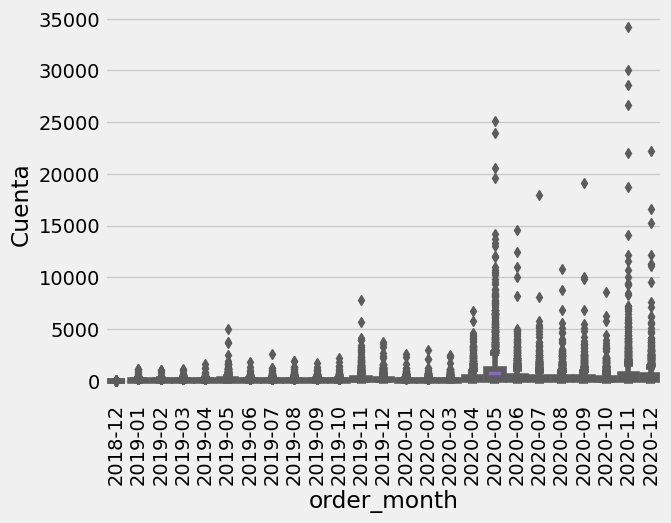

In [39]:
sns.boxplot(x=ventasMes["order_month"], y=ventasMes["Cuenta"], palette=sns.color_palette("hls", 24))
plt.xticks(rotation = 90)
plt.plot()
#Hay muchos datos átipicos

Al realizar los boxplots de ventas por mes, se observa que hay demasiados datos atípicos y una gran variabilidad en los resultados. Para reducir la escala de los datos y comprender mejor las relaciones subyacentes, se aplicará una transformación logarítmica. Esta práctica es común en el análisis de datos, ya que el logaritmo puede estabilizar la varianza y minimizar el impacto de los valores extremos, permitiendo una visualización más clara de las tendencias y patrones dentro de los datos.


[]

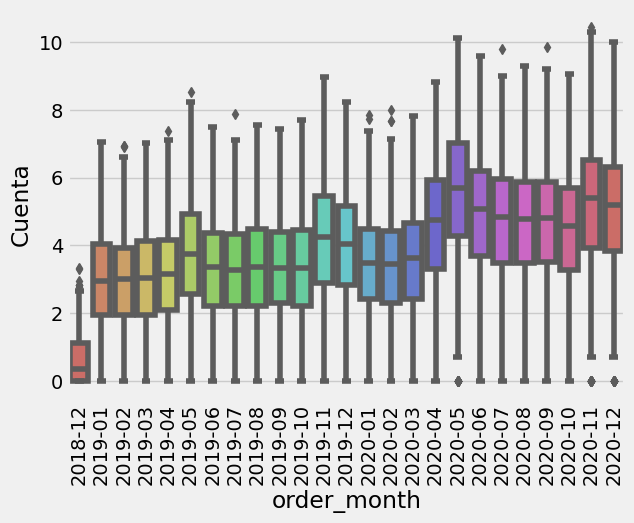

In [42]:
sns.boxplot(x=ventasMes["order_month"], y= np.log(ventasMes["Cuenta"]), palette=sns.color_palette("hls", 24))
plt.xticks(rotation = 90)
plt.plot()

Tras aplicar la transformación logarítmica a los datos, se observa un patrón notable en los meses de mayo, noviembre y diciembre, que corresponde a un aumento en las ventas. Estos picos pueden explicarse por la mayor actividad de compra durante eventos especiales y festivos: el Día de la Madre en mayo, el Buen Fin en noviembre, y las festividades de fin de año en diciembre. Estos periodos son conocidos por impulsar significativamente el consumo debido a promociones, ofertas especiales, y las celebraciones, lo que justifica el incremento en las ventas.

In [7]:
logMes = np.log(Mes)
logMes = logMes.replace([np.inf, -np.inf], 0)
pd.DataFrame(logMes).describe()

c:\Users\zaboo\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


order_month,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12
count,1768.000000,1768.000000,1768.000000,1768.000000,1768.000000,1768.000000,1768.000000,1768.000000,1768.000000,1768.000000,1768.000000,1768.000000,1768.000000,1768.000000,1768.000000,1768.000000,1768.000000,1768.000000,1768.000000,1768.000000,1768.000000,1768.000000,1768.000000,1768.000000,1768.000000
mean,0.165203,2.367805,2.313291,2.477123,2.535717,3.168175,2.748211,2.710558,2.803423,2.749230,2.828660,3.585099,3.428719,2.913559,2.871013,3.034324,4.030188,4.986313,4.319254,4.092527,4.076963,4.044260,3.881159,4.603335,4.484938
std,0.467439,1.762920,1.739787,1.784304,1.800577,2.028503,1.847626,1.818688,1.867241,1.857808,1.837821,2.157399,2.053692,1.863528,1.839296,1.912123,2.239489,2.504185,2.319495,2.265027,2.217946,2.246961,2.173542,2.434253,2.306925
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.693147,0.000000,0.693147,0.693147,1.609438,1.098612,1.314374,1.386294,1.098612,1.386294,2.079442,2.079442,1.609438,1.609438,1.609438,2.564949,3.713572,3.044522,2.772589,2.890372,2.708050,2.564949,3.218876,3.258097
50%,0.000000,2.564949,2.484907,2.639057,2.740319,3.349750,2.890372,2.890372,2.944439,2.944439,2.995732,3.912023,3.737670,3.091042,3.091042,3.258097,4.369448,5.402677,4.779123,4.543295,4.471622,4.430817,4.269673,5.056246,4.955827
75%,0.000000,3.737670,3.663562,3.871201,3.931826,4.720721,4.178204,4.094345,4.234107,4.223157,4.252041,5.204007,4.971543,4.290459,4.248495,4.454347,5.704614,6.854090,6.059123,5.790724,5.726848,5.667290,5.497168,6.366470,6.135558
max,3.332205,7.057898,6.944087,7.023759,7.387090,8.513587,7.483244,7.861342,7.554335,7.447168,7.709757,8.959697,8.226573,7.843456,7.993620,7.821643,8.820995,10.129666,9.584934,9.796626,9.283126,9.856553,9.060680,10.439220,10.006721


 Estos comportamientos periódicos, que muestran una tendencia creciente, sugieren que el problema puede abordarse utilizando técnicas de **series temporales**. Alternativamente, también se podrían emplear modelos de machine learning, como **redes neuronales recurrentes** (RNNs), para capturar las dependencias temporales en los datos. Sin embargo, dado que se desean modelar 1768 categorías diferentes con comportamientos independientes (es decir, no son muestras aleatorias de un mismo proceso), la mejor opción parece ser un modelo más sencillo. Esto permitiría capturar el comportamiento individual de cada categoría de manera más efectiva y eficiente.

## Visualización de ventas por producto por mes

C:\Users\zaboo\AppData\Local\Temp\ipykernel_16472\3831639547.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


(array([17897., 17987., 18078., 18170., 18262., 18353., 18444., 18536.,
        18628.]),
 [Text(17897.0, 0, '2019-01'),
  Text(17987.0, 0, '2019-04'),
  Text(18078.0, 0, '2019-07'),
  Text(18170.0, 0, '2019-10'),
  Text(18262.0, 0, '2020-01'),
  Text(18353.0, 0, '2020-04'),
  Text(18444.0, 0, '2020-07'),
  Text(18536.0, 0, '2020-10'),
  Text(18628.0, 0, '2021-01')])

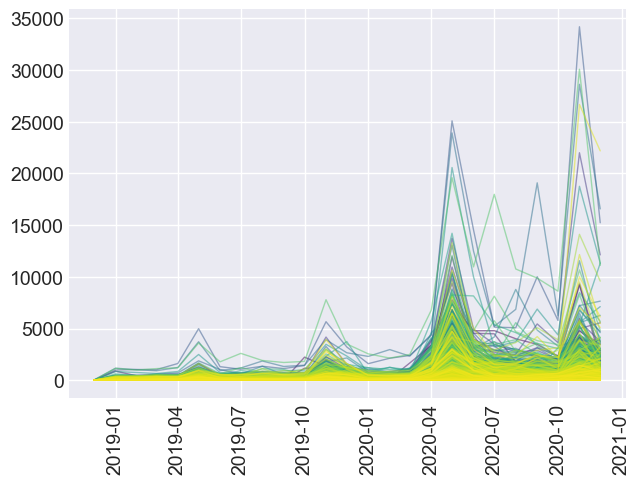

In [176]:
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap("viridis", 1800)
meses = Mes.columns.to_timestamp()

# Plot multiple lines
num=0
for ren in Mes.iterrows():
    plt.plot(meses, Mes.iloc[num,:], marker='', color=palette(num), linewidth=1, alpha=0.5, label = num)
    num += 1
plt.xticks(rotation = 90)

En esta gráfica se muestra el comportamiento de las ventas para cada categoría. Al utilizar una escala normal, se pierde algo de detalle debido al amplio rango de las ventas. No obstante, es posible apreciar los picos que siguen el ciclo de 5-7-5-7 meses, tal como se describió anteriormente. Esta periodicidad sugiere que las ventas tienden a aumentar en ciertos meses específicos, lo cual puede ser relevante para el análisis y la planificación estratégica.

C:\Users\zaboo\AppData\Local\Temp\ipykernel_16472\3662629121.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


(array([17897., 17987., 18078., 18170., 18262., 18353., 18444., 18536.,
        18628.]),
 [Text(17897.0, 0, '2019-01'),
  Text(17987.0, 0, '2019-04'),
  Text(18078.0, 0, '2019-07'),
  Text(18170.0, 0, '2019-10'),
  Text(18262.0, 0, '2020-01'),
  Text(18353.0, 0, '2020-04'),
  Text(18444.0, 0, '2020-07'),
  Text(18536.0, 0, '2020-10'),
  Text(18628.0, 0, '2021-01')])

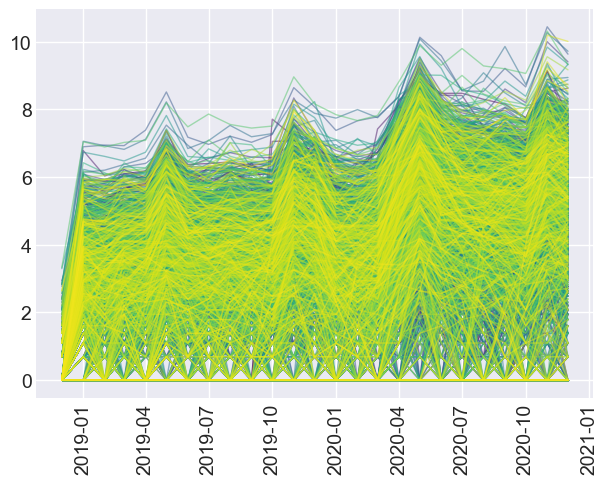

In [177]:
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap("viridis", 1800)
meses = Mes.columns.to_timestamp()

# Plot multiple lines
num=0
for ren in logMes.iterrows():
    plt.plot(meses, logMes.iloc[num,:], marker='', color=palette(num), linewidth=1, alpha=0.5, label = num)
    num += 1
plt.xticks(rotation = 90)

Esta gráfica muestra el comportamiento de las ventas de cada categoría en una escala logarítmica. Un aspecto importante a destacar es que algunas categorías no registran ventas en ciertos meses. Esto resalta la importancia de realizar un modelado individual para cada categoría, ya que existen algunas categorías cuyas ventas son significativamente mayores que otras. La variabilidad en los patrones de ventas entre las categorías sugiere que un enfoque personalizado podría mejorar la precisión y relevancia de los modelos.

**NOTA:** Debido a las propiedades del logaritmo, cuando hay cero ventas, el logaritmo resulta en -inf. Para manejar estos casos, se asignó un valor de 0 a las ventas de las categorías que no registraron ninguna venta. Asimismo, para las categorías que solo vendieron un producto, también se asignó un valor de 0 por la correspondencia de la funcción logoratimo. Dado que el objetivo del proyecto es pronosticar las 10 categorías más vendidas, se considera que este enfoque no afecta la generalidad del modelo, ya que las categorías con pocas o ninguna venta no son el foco principal del análisis. 

In [8]:
info = Mes.agg(['mean', 'median', 'max', 'min', 'std'], axis=1)

print('Los diez producto mas vendido usando la media')
print(info.sort_values("mean", ascending=False).iloc[0:10, :])

print('Los diez producto mas vendido usando el máximo')
info.sort_values("max", ascending=False).iloc[0:10, :]


Los diez producto mas vendido usando la media
         mean  median      max   min          std
cat                                              
1629  6481.76  2595.0  30063.0  28.0  7257.862434
830   6094.00  2654.0  28607.0  16.0  7795.813112
643   6010.00  2391.0  34174.0  11.0  8253.736442
1177  4026.00  1227.0  20561.0  17.0  5516.449643
1944  2863.32  1075.0  14104.0  14.0  3893.716324
1627  2523.88  1129.0  10663.0  10.0  2744.322159
2153  2482.96   241.0  26659.0   0.0  6664.286130
1382  2437.00  1107.0   8484.0   2.0  2743.994169
403   2426.92   484.0  21992.0   8.0  4836.565835
418   2082.00   864.0  13724.0   2.0  2896.599155
Los diez producto mas vendido usando el máximo


,mean,median,max,min,std
cat,,,,,
643,6010.00,2391.0,34174.0,11.0,8253.736442
1629,6481.76,2595.0,30063.0,28.0,7257.862434
830,6094.00,2654.0,28607.0,16.0,7795.813112
2153,2482.96,241.0,26659.0,0.0,6664.286130
403,2426.92,484.0,21992.0,8.0,4836.565835
1177,4026.00,1227.0,20561.0,17.0,5516.449643
1278,1602.60,446.0,14206.0,2.0,2966.498188
1944,2863.32,1075.0,14104.0,14.0,3893.716324
418,2082.00,864.0,13724.0,2.0,2896.599155


**Observación:** Algunos de estos productos se esperaria que aparecieran en las predicciones

<AxesSubplot: >

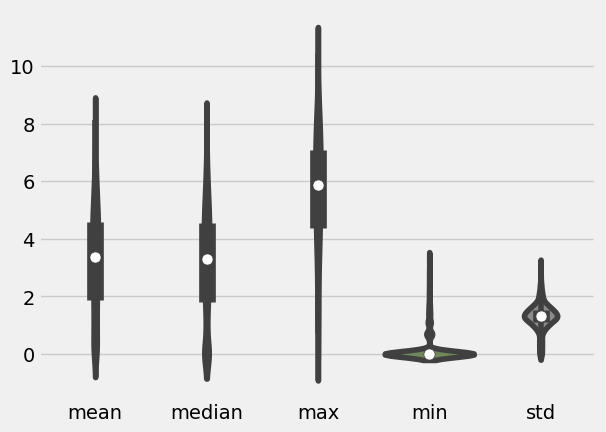

In [9]:
infolog = logMes.agg(['mean', 'median', 'max', 'min', 'std'], axis=1)
violin = pd.melt(infolog)

sns.violinplot(infolog)#data = violin, x = 'variable', y = 'value', palette=sns.color_palette("hls", 24))
#sns.stripplot(y='value', x='variable', data=pd.melt(np.log(info)))
#plt.xticks(rotation = 90)
#plt.plot()

En los gráficos de violín se muestra la distribución del valor medio, máximo, mínimo, desviación estándar y la mediana de las ventas por categoría. El objetivo de estos gráficos era visualizar si se podía realizar una agrupación de las categorías en función de alguna de estas estadísticas. A partir de la visualización, se observa que el mínimo, el máximo y la media parecen ser buenos separadores para agrupar las categorías, ya que muestran diferencias en la distribución de ventas entre las distintas categorías.

In [10]:
import statsmodels.api as sm
import statsmodels.graphics.functional as sgt

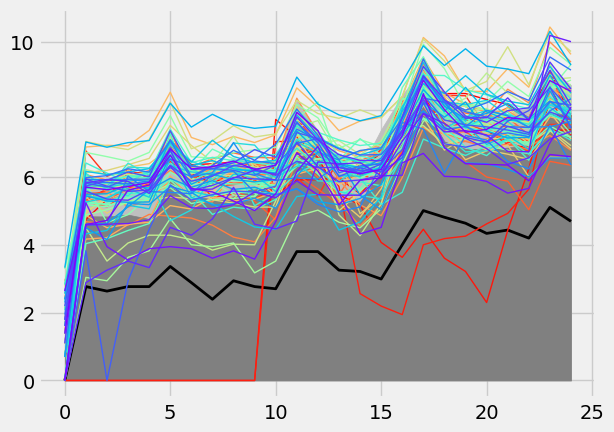

In [38]:
functionbf = sgt.fboxplot(logMes, plot_opts={'outlier_alpha': 0.1})

# Media

In [11]:
q1, q2, q3 = infolog['mean'].quantile(0.25), infolog['mean'].quantile(0.5), infolog['mean'].quantile(0.75)
logMes['clasif'] = np.zeros(logMes.shape[0])

In [12]:
logMes.loc[infolog['mean'] <= q1,'clasif'] = 'VentasBajas'
logMes.loc[(infolog['mean'] > q1) & (infolog['mean'] <= q2),'clasif'] = 'VentasMedianas'
logMes.loc[(infolog['mean'] > q2) & (infolog['mean'] <= q3),'clasif'] = 'VentasAltas'
logMes.loc[infolog['mean'] > q3,'clasif'] = 'VentasMejores'

In [41]:
print(q1, q2, q3)

1.8708515009029247 3.386556402579652 4.5964967174753655


[]

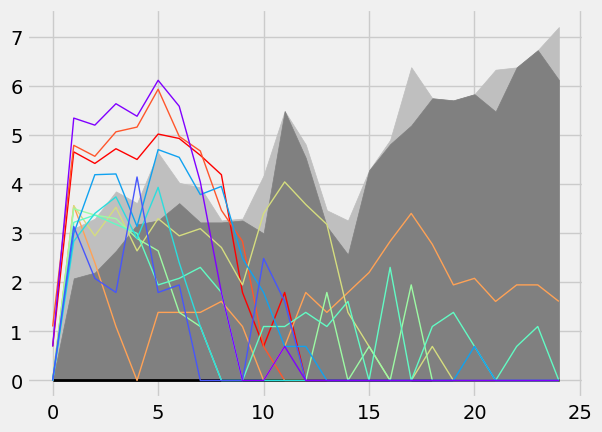

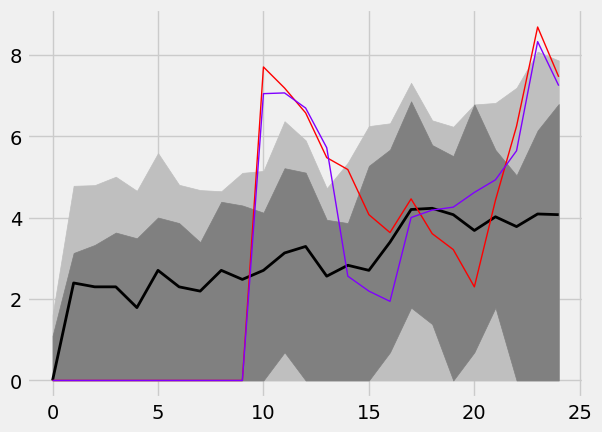

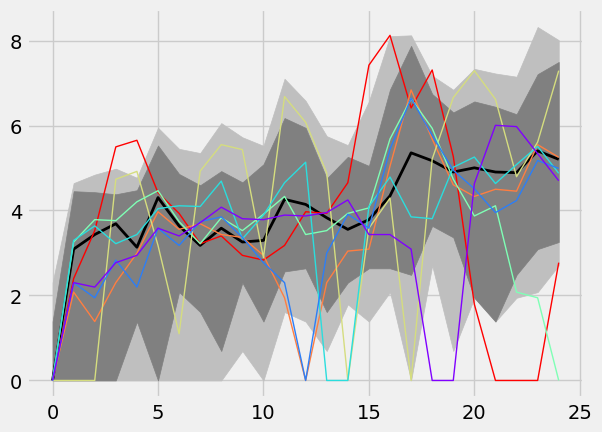

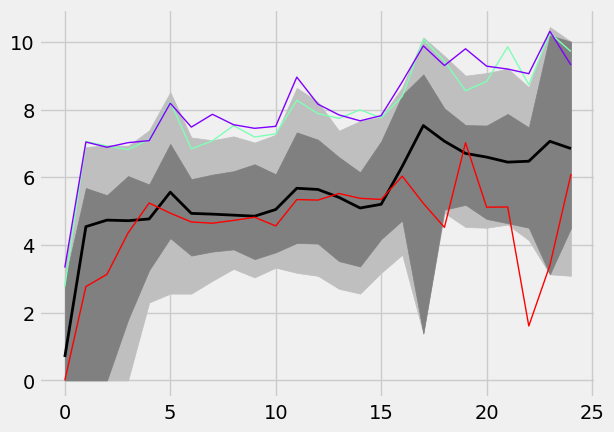

In [13]:
base1 = logMes.loc[logMes['clasif'] == 'VentasBajas']
base1 = base1.drop(['clasif'], axis = 1)

fig = plt.figure()
ax = fig.add_subplot(111)
res = sm.graphics.fboxplot(base1, ax=ax)
plt.plot()

base2 = logMes.loc[logMes['clasif'] == 'VentasMedianas']
base2 = base2.drop(['clasif'], axis = 1)

fig = plt.figure()
ax = fig.add_subplot(111)
res = sm.graphics.fboxplot(base2, wfactor=2.58, ax=ax)
plt.plot()

base3 = logMes.loc[logMes['clasif'] == 'VentasAltas']
base3 = base3.drop(['clasif'],  axis = 1)

fig = plt.figure()
ax = fig.add_subplot(111)
res = sm.graphics.fboxplot(base3, wfactor=2.58, ax=ax)
plt.plot()

base4 = logMes.loc[logMes['clasif'] == 'VentasMejores']
base4 = base4.drop(['clasif'], axis = 1)

fig = plt.figure()
ax = fig.add_subplot(111)
res = sm.graphics.fboxplot(base4, wfactor=2.58, ax=ax)
plt.plot()

Los comportamientos que se destacan de esta clasificación son los siguientes:
1. En la clasificación 'Ventas Bajas' no aumenta mayor a 3000, se muestra un patrón de aumento de 5-7-5-7 meses y una tendencia que aumenta con el tiempo. Se muestra un buen agrupamiento funcional.

2. En la clasificación 'Ventas Medias' se tiene un grupo cuyas ventas llegan hasta los 7000 productos. En esta la tendencia aumenta a mediados de 2020 y leugo vuelve a disminuir. Problablemente se trata de productos cuyo consumo fue consecuencia de la pandemia.

3. En esta clasifica de 'Ventas Altas' se vuelve a observar este patrón de 5-7-5-7 . 

4. 

[]

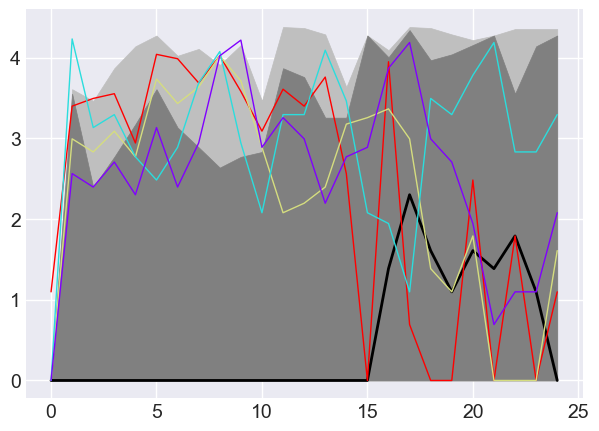

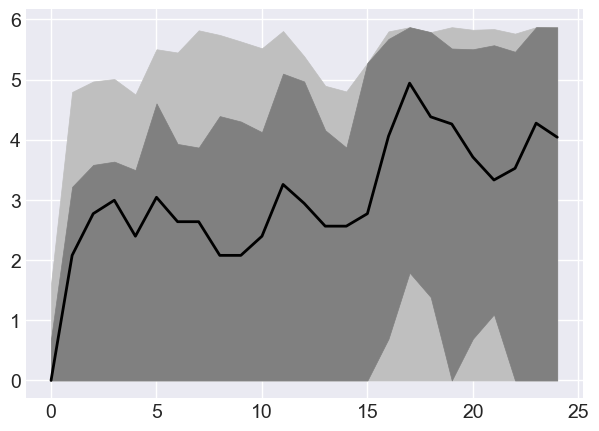

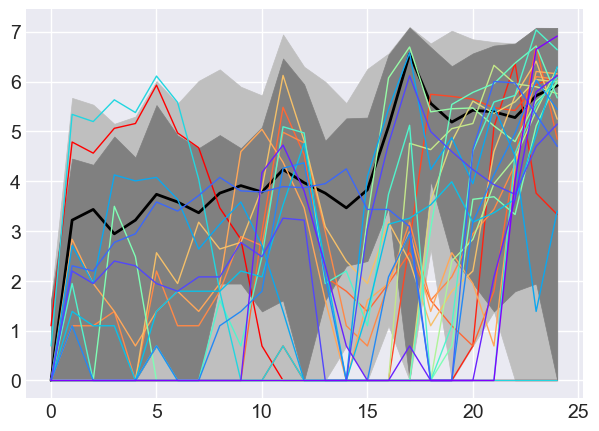

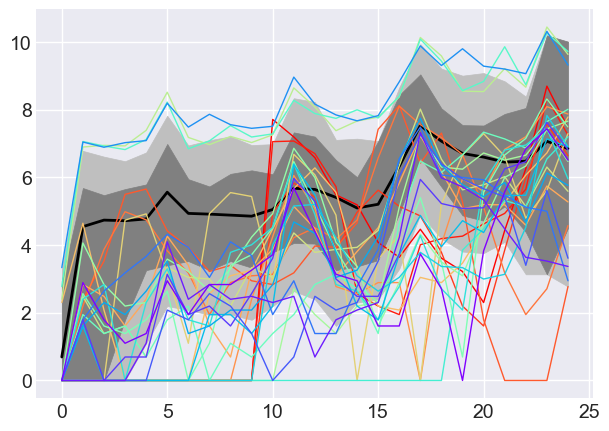

In [252]:
q1, q2, q3 = infolog['max'].quantile(0.25), infolog['max'].quantile(0.5), infolog['max'].quantile(0.75)
logMes['clasMax'] = np.zeros(Mes.shape[0])

logMes.loc[infolog['max'] <= q1,'clasMax'] = 'VentasBajas'
logMes.loc[(infolog['max'] > q1) & (infolog['max'] <= q2),'clasMax'] = 'VentasMedianas'
logMes.loc[(infolog['max'] > q2) & (infolog['max'] <= q3),'clasMax'] = 'VentasAltas'
logMes.loc[infolog['max'] > q3,'clasMax'] = 'VentasMejores'

base1 = logMes.loc[logMes['clasMax'] == 'VentasBajas']
base1 = base1.drop(['clasMax', 'clasif'], axis = 1)

fig = plt.figure()
ax = fig.add_subplot(111)
res = sm.graphics.fboxplot(base1, ax=ax)
plt.plot()

base2 = logMes.loc[logMes['clasMax'] == 'VentasMedianas']
base2 = base2.drop(['clasMax', 'clasif'], axis = 1)

fig = plt.figure()
ax = fig.add_subplot(111)
res = sm.graphics.fboxplot(base2, wfactor=2.58, ax=ax)
plt.plot()

base3 = logMes.loc[logMes['clasMax'] == 'VentasAltas']
base3 = base3.drop(['clasMax', 'clasif'],  axis = 1)

fig = plt.figure()
ax = fig.add_subplot(111)
res = sm.graphics.fboxplot(base3, wfactor=2.58, ax=ax)
plt.plot()

base4 = logMes.loc[logMes['clasMax'] == 'VentasMejores']
base4 = base4.drop(['clasMax', 'clasif'], axis = 1)

fig = plt.figure()
ax = fig.add_subplot(111)
res = sm.graphics.fboxplot(base4, wfactor=2.58, ax=ax)
plt.plot()

# Independent multi-series forecasting

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

from skforecast.ForecasterAutoregMultiSeries import ForecasterAutoregMultiSeries
from skforecast.model_selection_multiseries import backtesting_forecaster_multiseries
from skforecast.model_selection_multiseries import grid_search_forecaster_multiseries

In [15]:
#HACEMOS EL ENTREMAMIENTO CON LOS MEJORES DATOS

#dataTrain = logMes.transpose()
fechas = base4.columns
dataMejores = base4.transpose()
#Las columnas son string
dataMejores.columns = dataMejores.columns.map(str)

### Se procesa el conjunto test

In [16]:
test['order_date'] = pd.to_datetime(test['order_date'])

test['order_month'] = test['order_date'].dt.to_period('M')
test['order_date'] =  test['order_date'].dt.date

# Contar las ventas por categoria al mes
ventasMestest = test.groupby(['order_month', 'cat']).size().reset_index(name='Cuenta')

Mestest = ventasMestest.pivot_table(index='cat', columns='order_month', values='Cuenta', fill_value=0)
print(Mestest.shape, 'Máximo de ventas al mes: ', np.max(ventasMestest['Cuenta'] ))

logTest = np.log(Mestest)
logTest = logTest.replace([np.inf, -np.inf], 0)

C:\Users\zaboo\AppData\Local\Temp\ipykernel_16568\3321130079.py:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  test['order_month'] = test['order_date'].dt.to_period('M')


(2122, 12) Máximo de ventas al mes:  42987


c:\Users\zaboo\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


In [17]:
testIndex = dataMejores.columns
logTest = logTest.transpose()
logTest.columns = logTest.columns.map(str)

In [18]:
testMejores = logTest.loc[:, testIndex]

In [19]:
testMejores.head()

cat,0,1,16,21,22,28,29,34,36,52,53,84,105,106,115,124,136,138,152,183,187,189,247,250,252,255,256,257,259,261,262,266,269,270,275,276,285,292,294,295,296,298,299,300,303,315,319,327,329,339,341,344,348,349,354,355,370,373,383,385,403,410,412,414,415,418,419,420,422,424,441,447,449,451,462,464,465,466,507,519,522,523,524,532,540,543,560,562,579,599,607,632,636,643,644,645,647,648,653,659,660,666,683,689,692,695,704,706,707,708,710,713,718,719,725,726,727,755,762,763,764,765,767,768,769,773,774,779,780,790,794,809,814,830,831,832,834,842,844,856,858,860,862,863,880,881,888,890,891,892,893,894,913,914,927,937,938,943,951,953,955,968,974,975,976,978,983,986,988,992,993,996,998,1001,1002,1005,1016,1017,1023,1027,1034,1037,1050,1055,1065,1066,1069,1077,1090,1092,1101,1109,1124,1130,1133,1134,1135,1140,1141,1148,1154,1168,1169,1173,1174,1175,1177,1179,1191,1195,1196,1198,1199,1201,1217,1224,1230,1231,1232,1234,1236,1255,1257,1263,1266,1270,1272,1274,1276,1277,1278,1282,1284,1296,1297,1301,1302,1313,1317,1322,1324,1325,1334,1335,1337,1341,1346,1357,1359,1360,1361,1364,1368,1373,1377,1378,1382,1384,1386,1391,1392,1394,1397,1398,1399,1403,1405,1406,1407,1408,1409,1410,1411,1418,1423,1427,1428,1431,1432,1434,1435,1439,1441,1443,1447,1451,1452,1453,1455,1459,1460,1467,1471,1480,1482,1484,1490,1491,1493,1506,1507,1513,1517,1526,1532,1534,1536,1538,1539,1541,1555,1559,1563,1576,1577,1578,1580,1581,1601,1617,1627,1628,1629,1630,1633,1640,1646,1647,1653,1654,1655,1656,1660,1661,1669,1672,1695,1697,1702,1703,1704,1707,1712,1713,1717,1718,1725,1726,1727,1729,1740,1790,1793,1807,1825,1826,1827,1842,1844,1848,1862,1866,1871,1885,1889,1890,1891,1892,1898,1899,1900,1909,1914,1920,1923,1926,1929,1930,1931,1933,1935,1942,1944,1946,1947,1948,1960,1969,1970,1980,1983,2000,2011,2012,2013,2019,2028,2033,2035,2043,2044,2045,2046,2047,2048,2049,2050,2055,2056,2057,2058,2059,2064,2074,2085,2090,2103,2109,2111,2118,2135,2136,2144,2152,2153,2161,2168,2169,2170,2183,2186,2193,2195,2196,2198,2199,2200,2218,2220,2222,2223,2224
order_month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-01,6.897705,6.047372,6.699500,7.521318,6.212606,5.908083,6.909753,5.855072,6.924612,6.711740,6.749931,6.033086,6.436150,6.492240,7.701652,6.284134,5.843544,6.955593,6.186209,8.238801,6.259581,5.973810,6.363028,7.025538,6.954639,7.177019,6.144186,7.303843,5.549076,7.459915,7.649216,5.545177,6.378426,6.935370,7.412160,7.013915,6.556778,5.666427,7.187657,6.793466,6.161207,5.579730,5.971262,7.661527,6.175867,6.486161,6.517671,5.594711,7.717796,4.779123,6.398595,7.718685,6.816736,6.852243,5.686975,7.408531,6.102559,5.780744,5.093750,6.720220,8.759512,6.246107,7.883823,5.726848,6.091310,8.127995,7.297768,5.963579,6.977281,5.176150,6.257668,6.672033,7.905810,5.192957,5.517453,7.100852,6.220590,7.416980,6.444131,5.700444,5.700444,6.526495,7.717351,7.022868,5.874931,7.835579,5.793014,6.507278,7.177782,6.508769,6.969791,5.552960,6.690842,9.104313,5.897154,5.433722,6.742881,6.637258,5.749393,6.565265,6.274762,6.983790,5.379897,4.779123,5.808142,4.624973,7.111512,6.214608,5.720312,5.802118,7.339538,6.873164,7.742836,6.614726,5.720312,7.111512,5.869297,7.300473,7.921536,6.287859,6.693324,5.631212,5.572154,7.277248,7.099202,5.662960,4.990433,5.762051,5.874931,4.663439,6.942157,6.115892,7.336286,9.593901,6.609349,7.107425,6.175867,6.871091,6.628041,7.486053,5.988961,6.349139,5.998937,6.393591,6.169611,6.461468,6.309918,6.490724,6.077642,6.224558,6.610696,7.166266,5.899897,6.066108,7.891331,5.655992,6.519147,6.727432,6.028279,5.768321,4.852030,5.459586,8.521982,7.656337,7.392032,6.320768,7.763021,6.942157

## Regressor: RandomForest
Robusto al sobreajuste, maneja bien datos complejos y relaciones no lineales.

In [42]:
from sklearn.ensemble import RandomForestRegressor

forecaster = ForecasterAutoregMultiSeries(
    regressor = RandomForestRegressor(n_estimators=400, random_state=42),
    lags=7  # Usar los últimos 7 lags para predecir
)

# Entrenar el modelo con los datos de entrenamiento
forecaster.fit(dataMejores)

c:\Users\zaboo\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:1135: UserWarning: Series has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.
  warnings.warn(


In [43]:
# Realizar predicciones para cada categoría en el conjunto de prueba
pasos_prediccion = testMejores.shape[0]
predicciones = forecaster.predict(steps=pasos_prediccion)


In [44]:
# Calcular el error cuadrático medio (MSE) para cada categ =
predicciones.index = testMejores.index
np.sum(predicciones-testMejores, axis = 0)

0       12.563783
1        8.922407
1001     9.564575
1002    13.425656
1005    18.709599
          ...    
988     41.755178
992     15.028743
993     10.483040
996     10.517171
998      5.330516
Length: 442, dtype: float64

In [45]:
data10 = testMejores.apply(lambda x: x.nlargest(10).index.tolist(), axis=1)
pred10 = predicciones.apply(lambda x: x.nlargest(10).index.tolist(), axis=1)

In [46]:
final = []

for i in range(pred10.shape[0]):
    res = sum(x in data10.iloc[i] for x in pred10.iloc[i])
    
    final.append({
    	"Month": i+1,
    	"Categories": pred10.iloc[i]
	})
    print('Predicciones atinadas en el mes ', i+1, ': ', str(res) + '/10')

Predicciones atinadas en el mes  1 :  8/10
Predicciones atinadas en el mes  2 :  7/10
Predicciones atinadas en el mes  3 :  6/10
Predicciones atinadas en el mes  4 :  6/10
Predicciones atinadas en el mes  5 :  6/10
Predicciones atinadas en el mes  6 :  6/10
Predicciones atinadas en el mes  7 :  6/10
Predicciones atinadas en el mes  8 :  6/10
Predicciones atinadas en el mes  9 :  5/10
Predicciones atinadas en el mes  10 :  5/10
Predicciones atinadas en el mes  11 :  7/10
Predicciones atinadas en el mes  12 :  7/10


# HistGradientBoosting

In [22]:
from sklearn.ensemble import  HistGradientBoostingRegressor

In [29]:
# Definir el forecaster
forecaster_ms = ForecasterAutoregMultiSeries(
                    regressor          = HistGradientBoostingRegressor(random_state=8523),
                    lags               = 7,
                    encoding           = 'ordinal',
                    transformer_series = StandardScaler(),
                )

# Entrenar el modelo con los datos de entrenamiento
forecaster_ms.fit(dataMejores)

c:\Users\zaboo\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:1135: UserWarning: Series has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.
  warnings.warn(


In [30]:
# Realizar predicciones para cada categoría en el conjunto de prueba
pasos_prediccion_ms = testMejores.shape[0]
predicciones_ms = forecaster.predict(steps=pasos_prediccion_ms)

# Calcular el error cuadrático medio (MSE) para cada categ =
predicciones_ms.index = testMejores.index

In [31]:
np.sum(predicciones_ms-testMejores, axis = 0)

0       13.243977
1        8.855246
1001     9.071488
1002    14.085893
1005    19.475443
          ...    
988     42.634900
992     15.294687
993     10.558307
996     10.394735
998      5.223862
Length: 442, dtype: float64

In [32]:
pred10 = predicciones_ms.apply(lambda x: x.nlargest(10).index.tolist(), axis=1)

final = []

for i in range(pred10.shape[0]):
    res = sum(x in data10.iloc[i] for x in pred10.iloc[i])
    
    final.append({
    	"Month": i+1,
    	"Categories": pred10.iloc[i]
	})
    print('Predicciones atinadas en el mes ', i+1, ': ', str(res) + '/10')

Predicciones atinadas en el mes  1 :  8/10
Predicciones atinadas en el mes  2 :  7/10
Predicciones atinadas en el mes  3 :  6/10
Predicciones atinadas en el mes  4 :  6/10
Predicciones atinadas en el mes  5 :  6/10
Predicciones atinadas en el mes  6 :  5/10
Predicciones atinadas en el mes  7 :  8/10
Predicciones atinadas en el mes  8 :  6/10
Predicciones atinadas en el mes  9 :  6/10
Predicciones atinadas en el mes  10 :  4/10
Predicciones atinadas en el mes  11 :  7/10
Predicciones atinadas en el mes  12 :  6/10


# Resultados

In [267]:
import json
with open('resultados.json', 'w') as f:
    json.dumps(final, indent=2)

[
  {
    "Month": 1,
    "Categories": [
      "1629",
      "1627",
      "830",
      "2153",
      "643",
      "1382",
      "1027",
      "1177",
      "1195",
      "1944"
    ]
  },
  {
    "Month": 2,
    "Categories": [
      "1629",
      "830",
      "1627",
      "974",
      "1944",
      "1382",
      "643",
      "1177",
      "1027",
      "2109"
    ]
  },
  {
    "Month": 3,
    "Categories": [
      "830",
      "643",
      "1629",
      "403",
      "1177",
      "1944",
      "1027",
      "1382",
      "1627",
      "2109"
    ]
  },
  {
    "Month": 4,
    "Categories": [
      "830",
      "1629",
      "643",
      "1627",
      "1177",
      "21",
      "1382",
      "1944",
      "403",
      "2109"
    ]
  },
  {
    "Month": 5,
    "Categories": [
      "830",
      "643",
      "403",
      "1629",
      "1177",
      "1944",
      "2109",
      "2153",
      "1627",
      "762"
    ]
  },
  {
    "Month": 6,
    "Categories": [
      "830",
      "643",